In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json as js

In [2]:
pwd

'/Users/mingyuanma/Desktop/HAI/analysis'

In [7]:
before = pd.read_csv("../../data/phase1/combined1.csv")
before = before.rename(columns = {"label":"label_dim1"})

In [8]:
before_dim2 = pd.read_csv("../../data/phase1/before_dim2.csv")
before_dim2 = before_dim2.rename(columns = {"Unnamed: 2":"label"}).loc[:,["ResponseId", "label"]]
before = before_dim2.merge(before, how="right", left_on="ResponseId", right_on="ResponseId")
before = before[before["round"] >= 3]
before

,ResponseId,label,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label_dim1
135,R_0uOsLe6BeLnUee5,3,3,1,2,1,2,0,0,3
136,R_0uOsLe6BeLnUee5,3,3,1,1,1,2,1,0,3
137,R_0uOsLe6BeLnUee5,3,3,1,0,0,0,0,0,3
138,R_0uOsLe6BeLnUee5,3,3,2,0,0,0,0,0,3
139,R_0uOsLe6BeLnUee5,3,3,2,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
100561,R_zTlbYwl8ijcujhn,7,6,33,0,0,0,0,0,1
100562,R_zTlbYwl8ijcujhn,7,6,33,0,0,0,0,0,1
100563,R_zTlbYwl8ijcujhn,7,6,34,4,3,2,1,0,1
100564,R_zTlbYwl8ijcujhn,7,6,34,0,0,0,0,0,1


In [9]:
after = pd.read_csv("../../data/phase2/combined2.csv")
after = after.rename(columns = {"label":"label_dim1"})

In [10]:
after_dim2 = pd.read_csv("../../data/phase2/after_dim2.csv")
after_dim2 = after_dim2.rename(columns = {"Unnamed: 2":"label"}).loc[:,["ResponseId", "label"]]
after = after_dim2.merge(after, how="right", left_on="ResponseId", right_on="ResponseId")
after = after[after["round"] >= 3]
after

,ResponseId,label,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label_dim1
117,R_0HBxBV8U696D9QJ,4,3,1,1,1,2,0,0,2
118,R_0HBxBV8U696D9QJ,4,3,1,2,1,2,1,0,2
119,R_0HBxBV8U696D9QJ,4,3,1,0,0,0,0,0,2
120,R_0HBxBV8U696D9QJ,4,3,2,3,1,2,1,0,2
121,R_0HBxBV8U696D9QJ,4,3,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
141757,R_zZQIbE0LFD13yRX,5,6,37,0,0,0,0,0,3
141758,R_zZQIbE0LFD13yRX,5,6,37,0,0,0,0,0,3
141759,R_zZQIbE0LFD13yRX,5,6,38,4,3,2,1,0,3
141760,R_zZQIbE0LFD13yRX,5,6,38,0,0,0,0,0,3


# chi-square testing

In [11]:
from scipy.stats import chi2_contingency
from collections import Counter

def chisquare(array1, array2, count=True):
    if not count:
        data = [array1, array2]
        stat, p, dof, expected = chi2_contingency(data)
        
    else:
        c1, c2 = Counter(array1), Counter(array2)
        before_dis, after_dis = [], []
        for i in set(c1).union(set(c2)):
            before_dis.append(c1[i])
            after_dis.append(c2[i])
        print(before_dis)
        print(after_dis)
        data = [before_dis, after_dis]
        stat, p, dof, expected = chi2_contingency(data)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('difference between the two distributions (reject H0)')
    else:
        print('no difference between the two distributions (H0 holds true)')

# Distribution of label before and after

In [12]:
d1 = before.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
d2 = after.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
d1

,ResponseId,label,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label_dim1
0,R_0uOsLe6BeLnUee5,3,3,1,2,1,2,0,0,3
1,R_10CNCLuGIedQoz2,3,3,1,1,1,2,0,0,1
2,R_12nnne04OpWcY9q,6,3,1,2,1,2,0,0,2
3,R_1C3aMTZKkeXGDUk,4,3,1,1,1,2,0,0,2
4,R_1DS9jhDoVpEt1m2,3,3,1,1,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
165,R_xA5B0rSmbSjH6XT,3,3,1,1,1,2,1,0,2
166,R_yjpyDhIt4Ei7bfX,4,3,1,1,1,2,0,0,2
167,R_yw09VUoOXdh6KA1,3,3,1,1,1,2,0,0,6
168,R_yyU2mNdEqpH2jWp,5,3,1,1,1,2,0,0,8


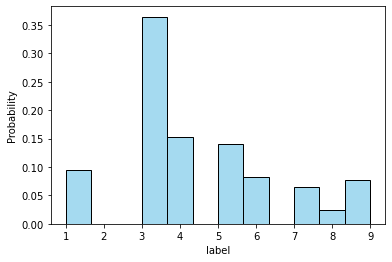

In [13]:
sns.histplot(data=d1, x="label", stat="probability", color="skyblue");

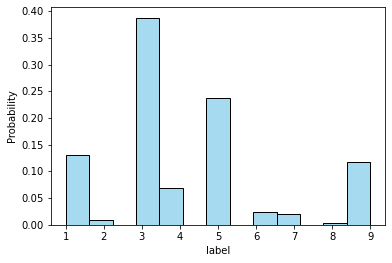

In [14]:
sns.histplot(data=d2, x="label", stat="probability", color="skyblue");

### Chi-Square Testing

In [15]:
chisquare(d1["label"], d2["label"])

[16, 0, 62, 26, 24, 14, 11, 4, 13]
[32, 2, 95, 17, 58, 6, 5, 1, 29]
p value is 0.0001373003673541072
difference between the two distributions (reject H0)


# Analysis of Compliance

In [16]:
def compliance(df):
    ids = []
    rounds = []
    server = []
    label = []
    for player in set(np.array(df["ResponseId"])):
        for i in np.arange(1,7):
            tem = df[(df["ResponseId"] == player) & (df["round"] == i)]
            if len(tem) != 0: # no response there
                ids.append(player)
                rounds.append(i)
                l = df[(df["ResponseId"] == player)]["label"].iloc[0]
                label.append(l)
                if i <= 2:
                    num = sum((tem["workerId"] == 2) & (tem["taskId"] == 2))
                else:
                    num = sum((tem["workerId"] == 1) & (tem["taskId"] == 2))
                server.append(num)
#             else:
#                 print(player, i)
    d = {
        "ResponseId": ids,
        "round": rounds,
        "numServerCook": server,
        "label": label
    }
    return pd.DataFrame(d)

In [17]:
before_compliance = compliance(before)

In [18]:
after_compliance = compliance(after)

In [19]:
before_compliance

,ResponseId,round,numServerCook,label
0,R_1kTEUSBbtEZ5chq,3,0,4
1,R_1kTEUSBbtEZ5chq,4,1,4
2,R_1kTEUSBbtEZ5chq,5,1,4
3,R_1kTEUSBbtEZ5chq,6,1,4
4,R_1du9bG1q6ISbhTO,3,1,3
...,...,...,...,...
675,R_3GdmKN2wu4IkdP1,6,1,4
676,R_2wyRKJQoVYyCkBZ,3,1,3
677,R_2wyRKJQoVYyCkBZ,4,1,3
678,R_2wyRKJQoVYyCkBZ,5,1,3


In [20]:
after_compliance

,ResponseId,round,numServerCook,label
0,R_2ZBVsuKav7vkDJC,3,1,1
1,R_2ZBVsuKav7vkDJC,4,0,1
2,R_2ZBVsuKav7vkDJC,5,2,1
3,R_2ZBVsuKav7vkDJC,6,2,1
4,R_3CBo6Xi6oHuTN6H,3,1,9
...,...,...,...,...
975,R_32QHwRP1TU8qZrn,6,2,5
976,R_2UXCrtFoXq0W43I,3,1,3
977,R_2UXCrtFoXq0W43I,4,2,3
978,R_2UXCrtFoXq0W43I,5,2,3


## group by rounds

In [21]:
round_before = before_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_before

,numServerCook
round,
3,1.105882
4,1.158824
5,1.064706
6,1.252941


In [22]:
round_after = after_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_after

,numServerCook
round,
3,1.453061
4,1.697959
5,1.673469
6,1.885714


In [23]:
a = np.array(round_before["numServerCook"])

In [24]:
b = np.array(round_after["numServerCook"])

### chi-square testing

In [25]:
chisquare(a, b, count=False)

p value is 0.9996853376062372
no difference between the two distributions (H0 holds true)


## group by tip

In [26]:
tip_before = before_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_before

,label,numServerCook
0,1,1.000000
1,3,1.116935
2,4,1.028846
3,5,0.958333
4,6,1.285714
5,7,0.840909
6,8,2.687500
7,9,1.673077


In [27]:
tip_after = after_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_after

,label,numServerCook
0,1,1.539062
1,2,1.375000
2,3,1.728947
3,4,1.514706
4,5,1.512931
5,6,1.208333
6,7,1.600000
7,8,1.000000
8,9,2.241379


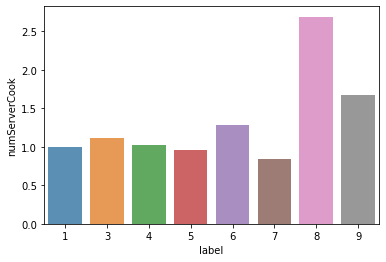

In [28]:
sns.barplot(x="label", y="numServerCook", data=tip_before, alpha=0.8);

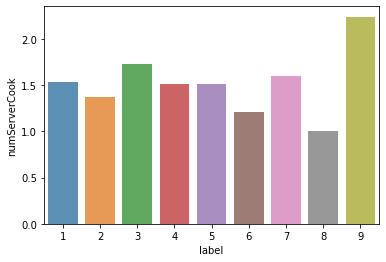

In [29]:
sns.barplot(x="label", y="numServerCook", data=tip_after, alpha=0.8);

### chi-square testing

In [30]:
np.array(tip_before["numServerCook"])

array([1.        , 1.11693548, 1.02884615, 0.95833333, 1.28571429,
       0.84090909, 2.6875    , 1.67307692])

In [31]:
tb = np.array([2.14236111, 2.03389831, 2.00757576, 1.94444444, 0, 2.15740741, 2.41666667, 2.05555556, 0])
chisquare(np.array(tb),
         np.array(tip_after["numServerCook"]),count=False)

p value is 0.7764616392957914
no difference between the two distributions (H0 holds true)


## Testing Aversion Distribution

In [32]:
ave_before = before_compliance[(before_compliance["numServerCook"] >= 3) 
                               | (before_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_before = ave_before.rename(columns = {"round":"numAversion"})
ave_before

,numAversion
label,
1,13
3,39
4,14
5,14
6,12
7,10
8,4
9,9


In [33]:
ave_after = after_compliance[(after_compliance["numServerCook"] >= 3) 
                               | (after_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_after = ave_after.rename(columns = {"round":"numAversion"})
label = np.arange(1,10)
numAversion = np.array(ave_after.numAversion).tolist()
numAversion.append(41)
numAversion[7] = 0
ave_after = pd.DataFrame({"label":label, "numAversion":numAversion}).set_index("label")
ave_after

,numAversion
label,
1,9
2,1
3,51
4,9
5,19
6,1
7,1
8,0
9,41


In [34]:
def counting(df):
    count = []
    for i in np.arange(1,10):
        cou = len(df[df["label"] == i])
        count.append(cou)
    return count

In [35]:
counting(before_compliance), counting(after_compliance)
[_ for _ in counting(before_compliance) if _]

[64, 248, 104, 96, 56, 44, 16, 52]

In [36]:
after_compliance

,ResponseId,round,numServerCook,label
0,R_2ZBVsuKav7vkDJC,3,1,1
1,R_2ZBVsuKav7vkDJC,4,0,1
2,R_2ZBVsuKav7vkDJC,5,2,1
3,R_2ZBVsuKav7vkDJC,6,2,1
4,R_3CBo6Xi6oHuTN6H,3,1,9
...,...,...,...,...
975,R_32QHwRP1TU8qZrn,6,2,5
976,R_2UXCrtFoXq0W43I,3,1,3
977,R_2UXCrtFoXq0W43I,4,2,3
978,R_2UXCrtFoXq0W43I,5,2,3


In [37]:
sum(counting(after_compliance))

980

In [38]:
ave_before['total_num_label'] = [_ for _ in counting(before_compliance) if _]
ave_before["proportion_aversion"] = ave_before["numAversion"] / ave_before['total_num_label']
ave_before["proportion_label"] = ave_before['total_num_label'] / before_compliance.shape[0]
ave_before

,numAversion,total_num_label,proportion_aversion,proportion_label
label,,,,
1,13,64,0.203125,0.094118
3,39,248,0.157258,0.364706
4,14,104,0.134615,0.152941
5,14,96,0.145833,0.141176
6,12,56,0.214286,0.082353
7,10,44,0.227273,0.064706
8,4,16,0.250000,0.023529
9,9,52,0.173077,0.076471


In [39]:
ave_after['total_num_label'] = counting(after_compliance)
ave_after["proportion_aversion"] = ave_after["numAversion"] / ave_after['total_num_label']
ave_after["proportion_label"] = ave_after['total_num_label'] / after_compliance.shape[0]
ave_after

,numAversion,total_num_label,proportion_aversion,proportion_label
label,,,,
1,9,128,0.070312,0.130612
2,1,8,0.125000,0.008163
3,51,380,0.134211,0.387755
4,9,68,0.132353,0.069388
5,19,232,0.081897,0.236735
6,1,24,0.041667,0.024490
7,1,20,0.050000,0.020408
8,0,4,0.000000,0.004082
9,41,116,0.353448,0.118367


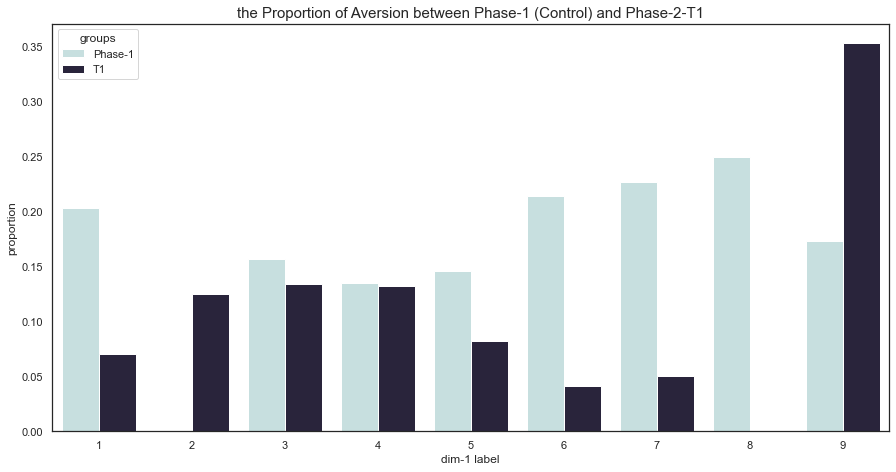

In [59]:
types = [1,3,4,5,6,7,8,9] + [_ for  _ in range(1,10)]
proportion = ave_before["proportion_aversion"].tolist() + ave_after["proportion_aversion"].tolist()
groups = ["Phase-1"]*8 + ["T1"]*9
comparison = pd.DataFrame({
    "dim-1 label":types,
    "proportion":proportion,
    "groups":groups
})
sns.set_style("white")

a = sns.barplot(x = "dim-1 label",
            y = "proportion",
            hue = "groups",
            data = comparison,
            palette = "ch:start=.2,rot=-.3",
            alpha=1).set_title(
  "the Proportion of Aversion between Phase-1 (Control) and Phase-2-T1",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(15,7.5)})

## Testing Compliance Distribution

In [42]:
com_before = before_compliance[before_compliance["numServerCook"] ==2].groupby(
                                "label").count().loc[:,["round"]]
com_before = com_before.rename(columns = {"round":"numCompliance"})

In [48]:
com_after = after_compliance[after_compliance["numServerCook"] ==2].groupby(
                                "label").count().loc[:,["round"]]
com_after = com_after.rename(columns = {"round":"numCompliance"})
label = np.arange(1,10)
num = np.array([62, 4, 144, 21, 86, 6, 13, 0, 46])
com_after = pd.DataFrame({
    "label":label,
    "numCompliance":num
}).set_index("label")
com_after

,numCompliance
label,
1,62
2,4
3,144
4,21
5,86
6,6
7,13
8,0
9,46


In [49]:
com_before['total_num_label'] = [_ for _ in counting(before_compliance) if _]
com_before["proportion_compliance"] = com_before["numCompliance"] / com_before['total_num_label']
com_before["proportion_label"] = com_before['total_num_label'] / before_compliance.shape[0]
com_before

,numCompliance,total_num_label,proportion_compliance,proportion_label
label,,,,
1,9,64,0.140625,0.094118
3,23,248,0.092742,0.364706
4,6,104,0.057692,0.152941
5,4,96,0.041667,0.141176
6,7,56,0.125000,0.082353
7,3,44,0.068182,0.064706
8,4,16,0.250000,0.023529
9,23,52,0.442308,0.076471


In [50]:
com_after['total_num_label'] = counting(after_compliance)
com_after["proportion_compliance"] = com_after["numCompliance"] / com_after['total_num_label']
com_after["proportion_label"] = com_after['total_num_label'] / after_compliance.shape[0]
com_after

,numCompliance,total_num_label,proportion_compliance,proportion_label
label,,,,
1,62,128,0.484375,0.130612
2,4,8,0.500000,0.008163
3,144,380,0.378947,0.387755
4,21,68,0.308824,0.069388
5,86,232,0.370690,0.236735
6,6,24,0.250000,0.024490
7,13,20,0.650000,0.020408
8,0,4,0.000000,0.004082
9,46,116,0.396552,0.118367


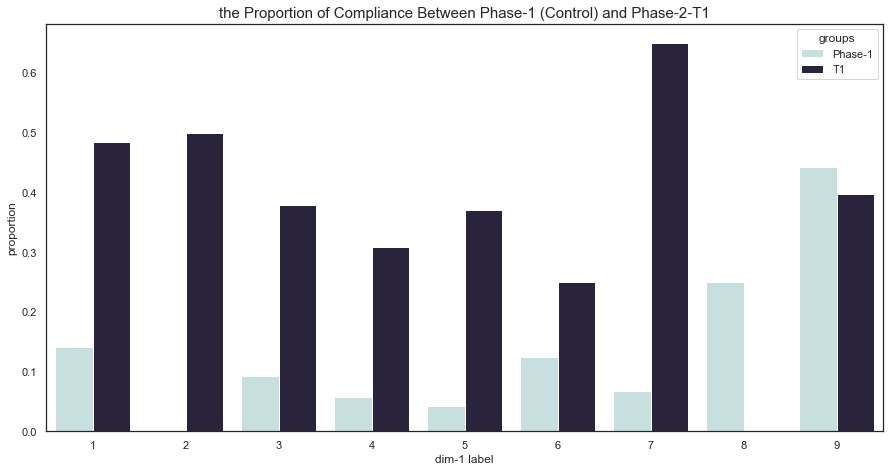

In [62]:
types = [1,3,4,5,6,7,8,9] + [_ for  _ in range(1,10)]
proportion = com_before["proportion_compliance"].tolist() + com_after["proportion_compliance"].tolist()
groups = ["Phase-1"]*8 + ["T1"]*9
comparison = pd.DataFrame({
    "dim-1 label":types,
    "proportion":proportion,
    "groups":groups
})
sns.set_style("white")

a = sns.barplot(x = "dim-1 label",
            y = "proportion",
            hue = "groups",
            data = comparison,
            palette = "ch:start=.2,rot=-.3",
            alpha=1).set_title(
  "the Proportion of Compliance Between Phase-1 (Control) and Phase-2-T1",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(15,7.5)})